In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv', low_memory=False)

## 1. Loan Status Distribution

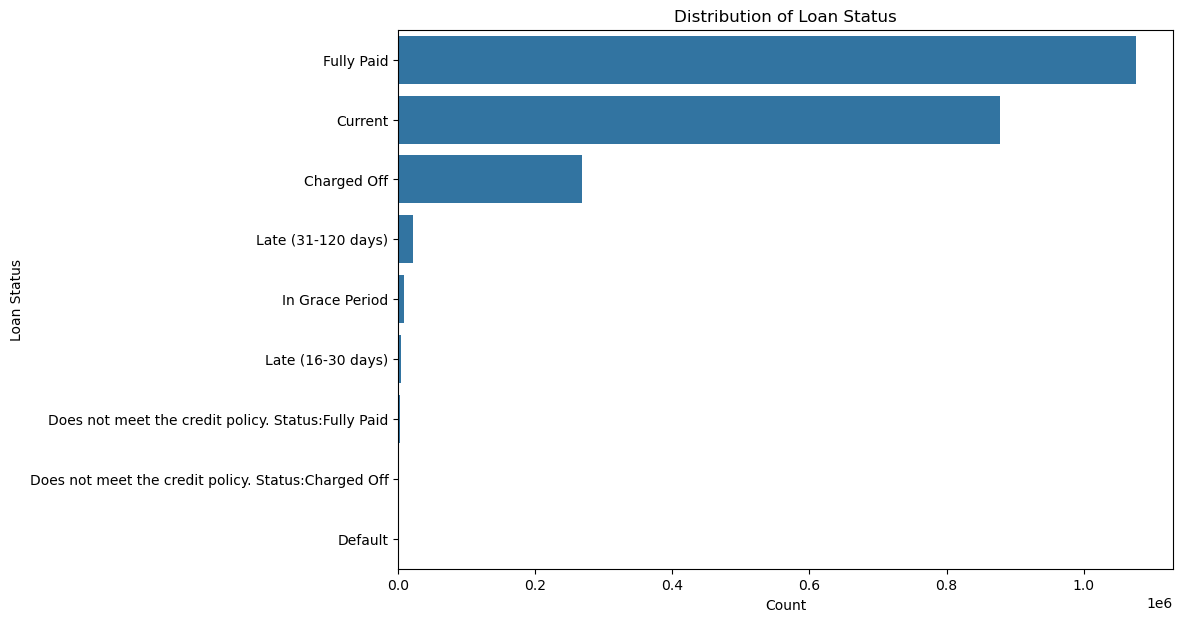

In [11]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, y='loan_status', order=df['loan_status'].value_counts().index)
plt.title('Distribution of Loan Status')
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.show()

## 2. Key Numerical Features Analysis

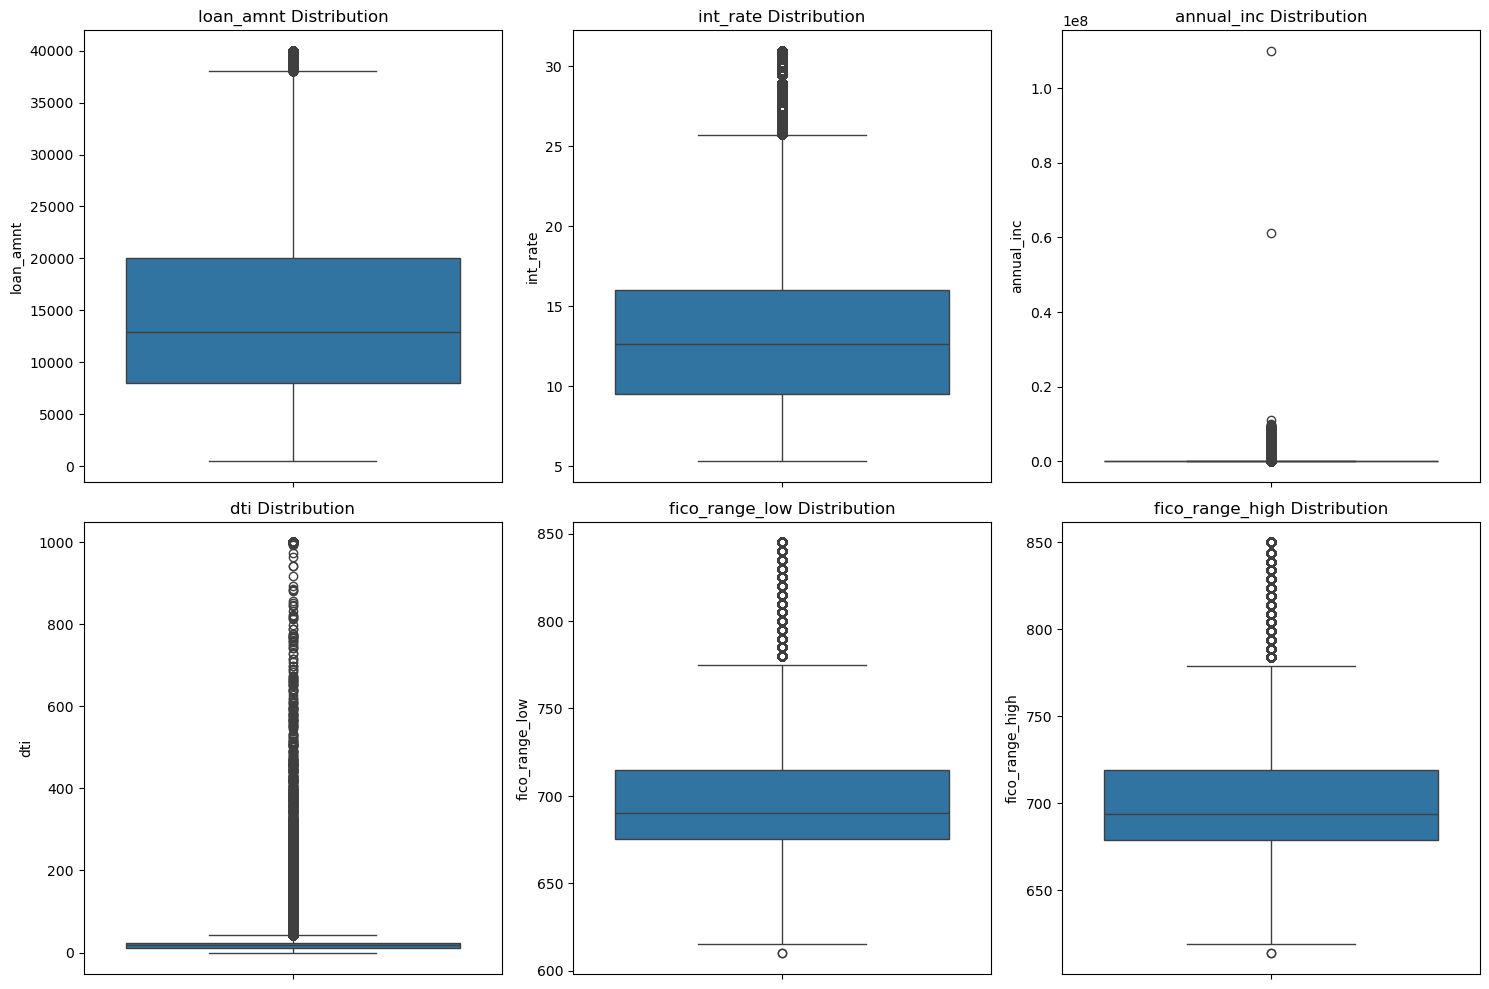

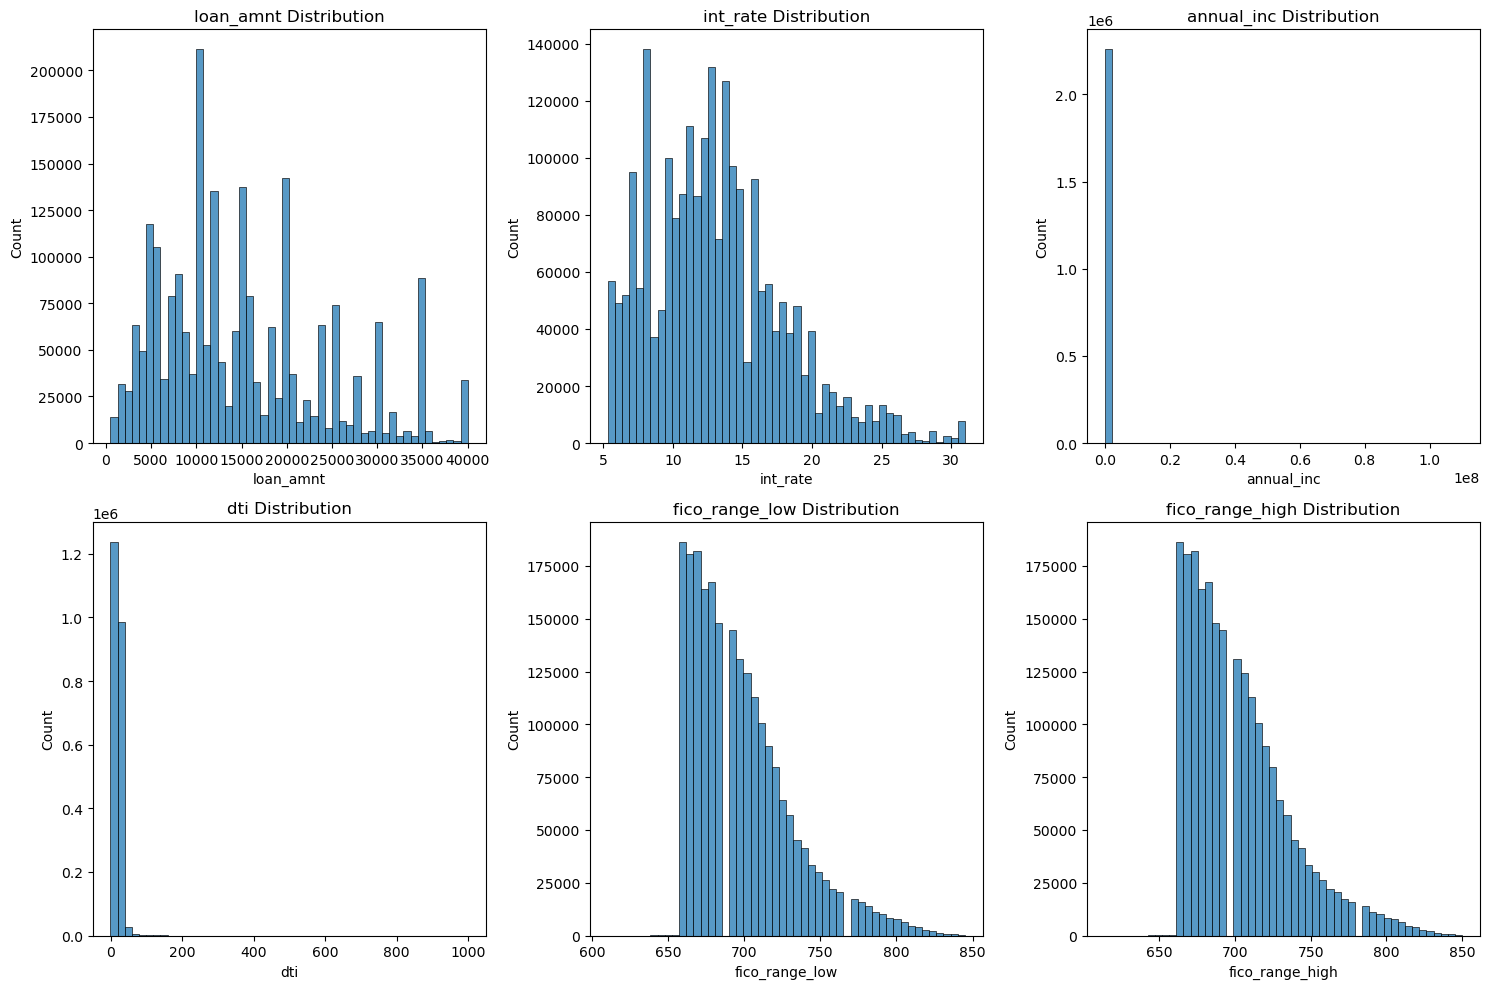

In [12]:
numerical_features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=feature)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=feature, bins=50)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

## 3. Correlation Analysis

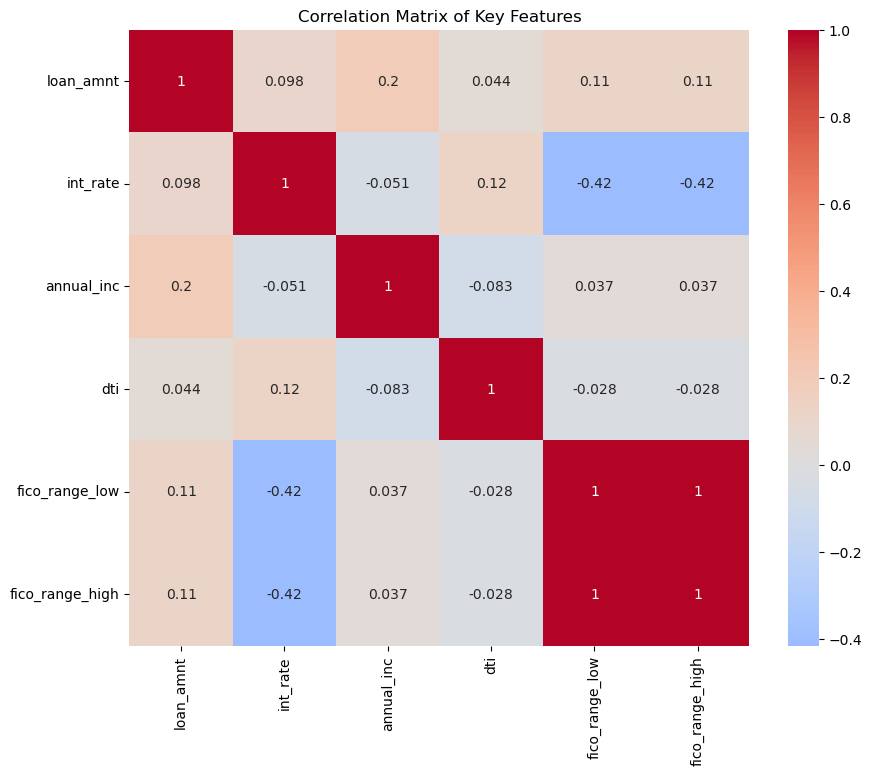

In [7]:
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Features')
plt.show()

## 4. Temporal Analysis

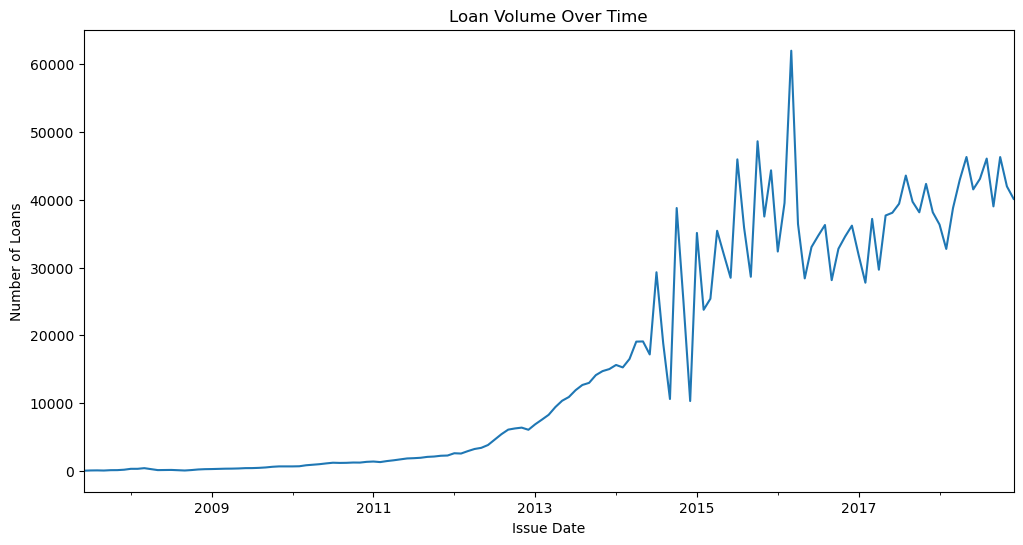

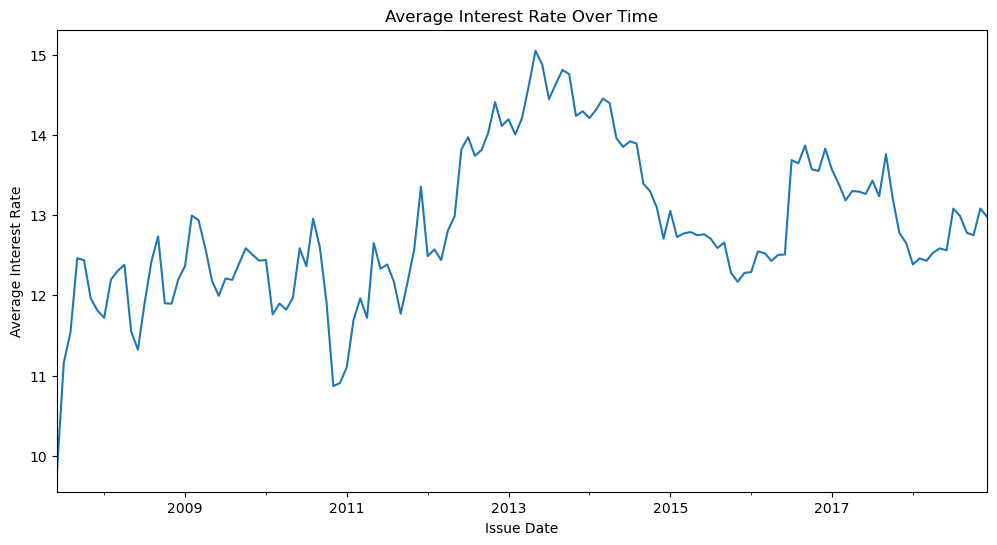

In [17]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%Y-%m')

plt.figure(figsize=(12, 6))
df.groupby('issue_d').size().plot()
plt.title('Loan Volume Over Time')
plt.xlabel('Issue Date')
plt.ylabel('Number of Loans')
plt.show()

plt.figure(figsize=(12, 6))
df.groupby('issue_d')['int_rate'].mean().plot()
plt.title('Average Interest Rate Over Time')
plt.xlabel('Issue Date')
plt.ylabel('Average Interest Rate')
plt.show()

## 5. Categorical Variables Analysis

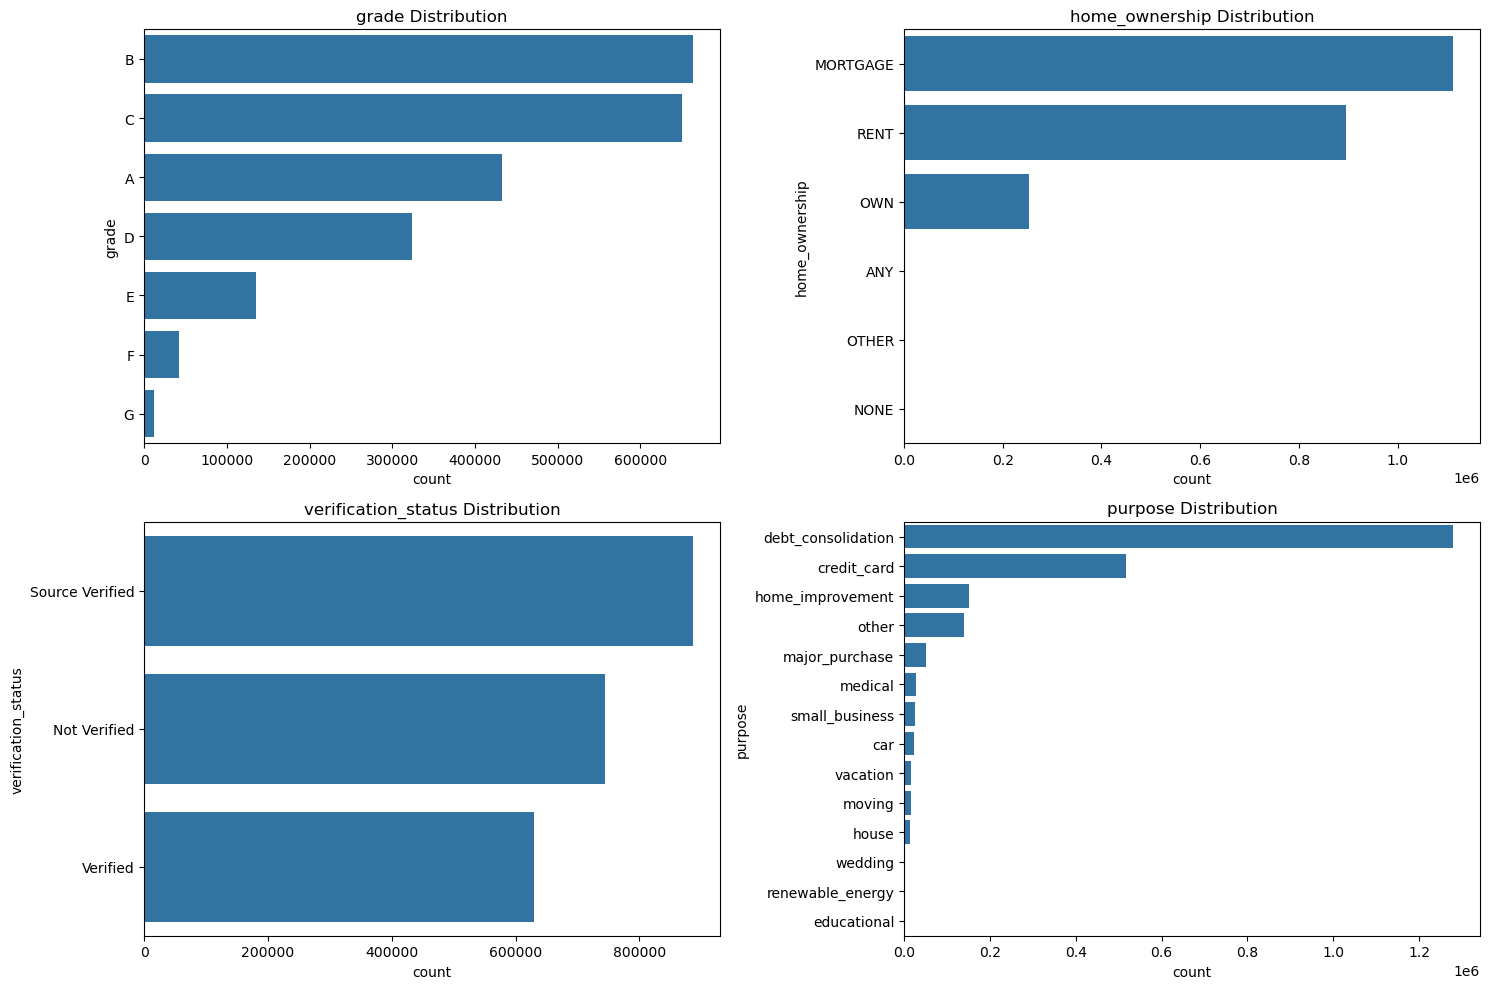

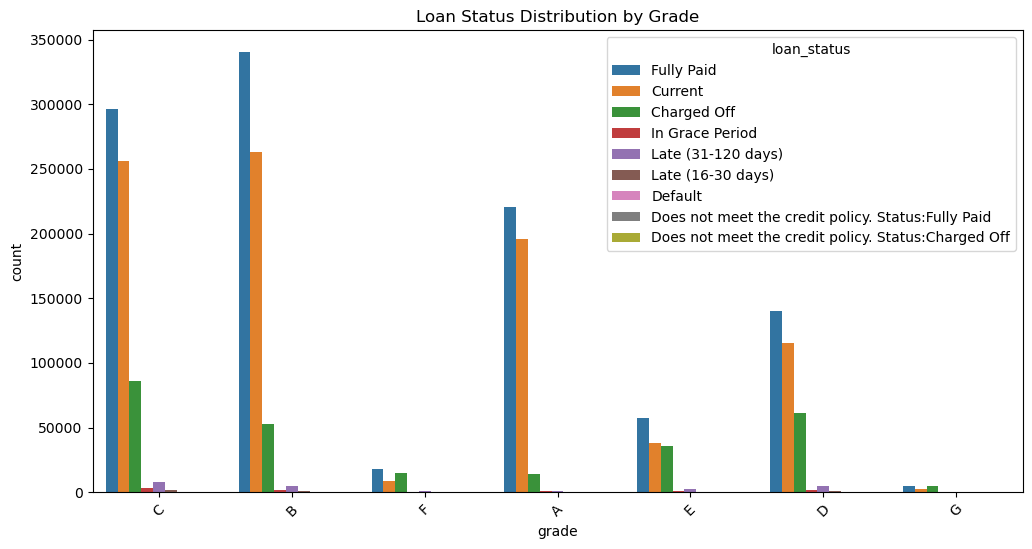

In [9]:
categorical_features = ['grade', 'home_ownership', 'verification_status', 'purpose']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, y=feature, order=df[feature].value_counts().index)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='grade', hue='loan_status')
plt.title('Loan Status Distribution by Grade')
plt.xticks(rotation=45)
plt.show()

## 6. Missing Values Analysis

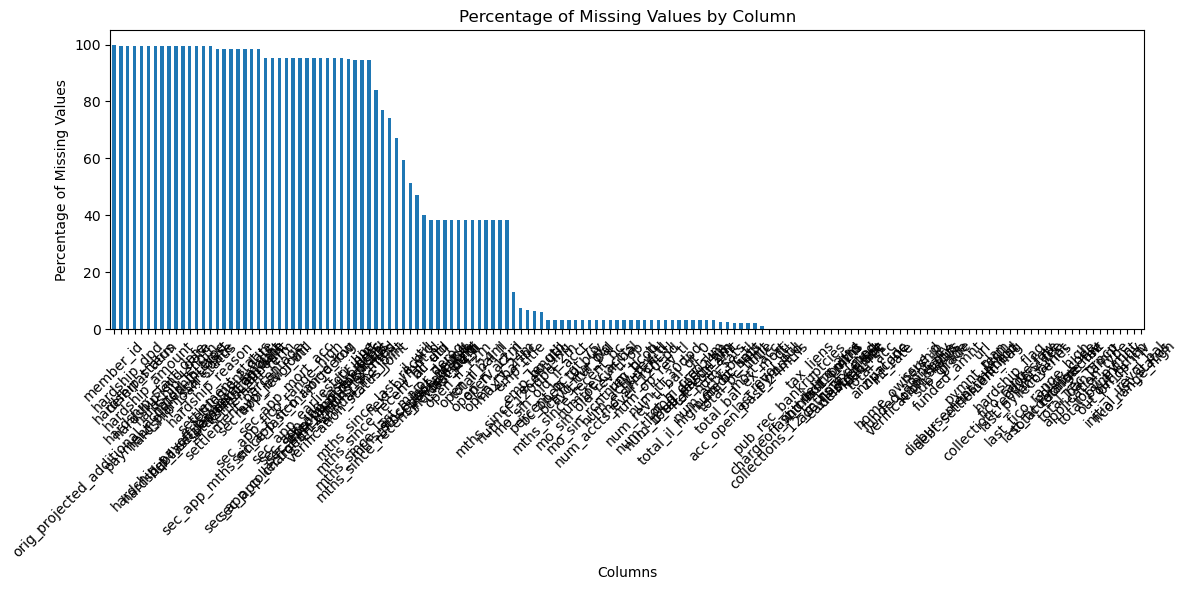

In [10]:
missing_values = (df.isnull().sum() / len(df)) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()